# import lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Reading The Data

In [2]:
data = pd.read_csv('calories_burn.csv')
data = data.drop('User_ID', axis=1)
data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
14995,female,20,193,86,11,92,40.4,45
14996,female,27,165,65,6,85,39.2,23
14997,female,43,159,58,16,90,40.1,75
14998,male,78,193,97,2,84,38.3,11


## Checking Types, Null Values, Duplicates, and Numerical Columns Statistics

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  int64  
 3   Weight      15000 non-null  int64  
 4   Duration    15000 non-null  int64  
 5   Heart_Rate  15000 non-null  int64  
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 937.6+ KB


In [4]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [5]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
duplicate = data[data.duplicated()]
duplicate

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
12852,female,28,164,59,9,90,39.5,40


In [8]:
data.drop_duplicates(inplace=True)

# Outliers Boxplot

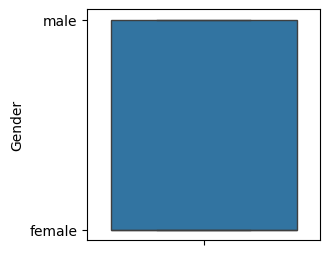

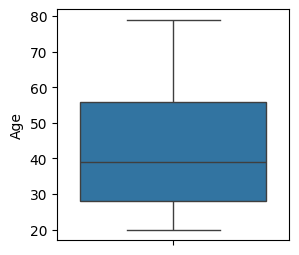

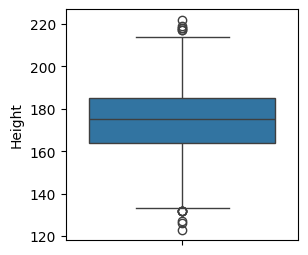

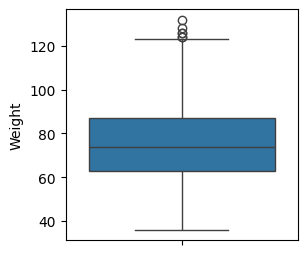

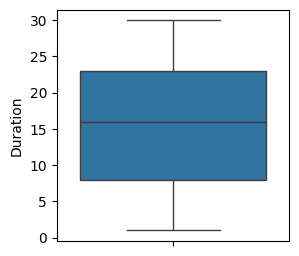

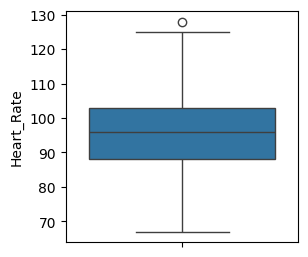

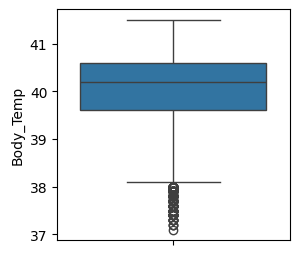

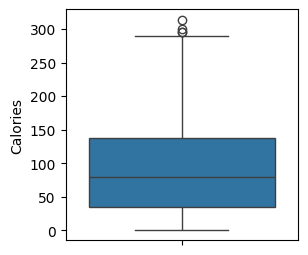

In [9]:
for i in data.columns:
    plt.figure(figsize=(3, 3))
    sns.boxplot(data[i])
    plt.show()


## Distribution histogram

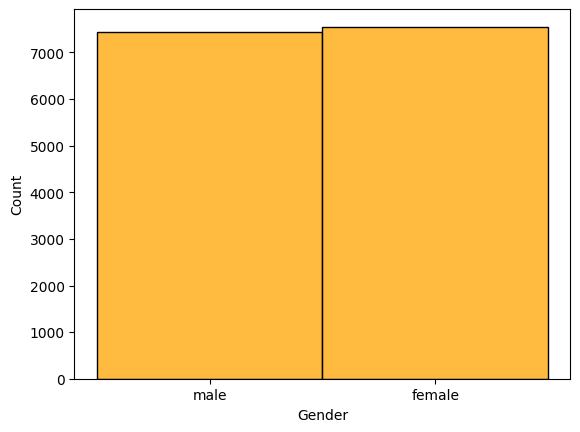

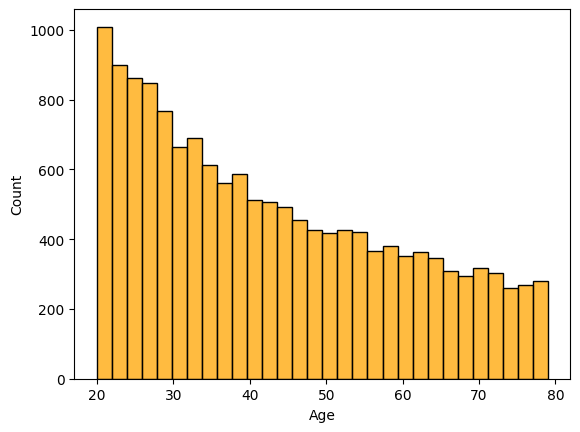

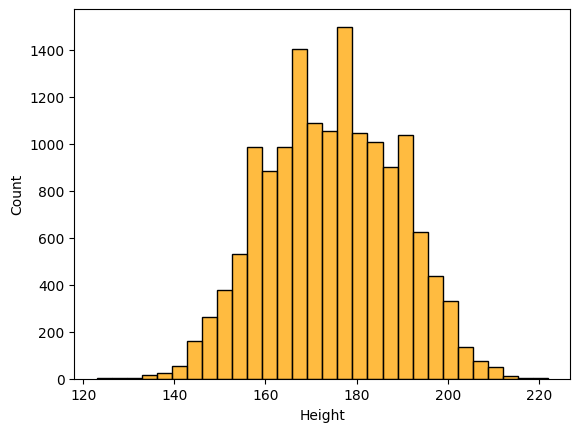

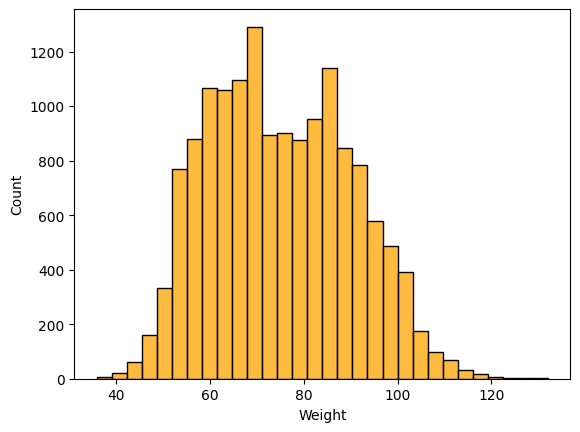

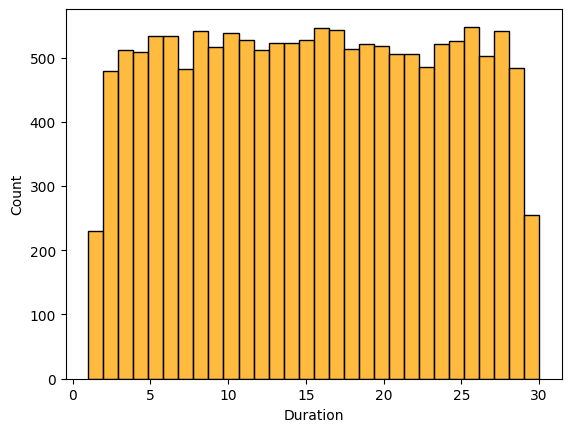

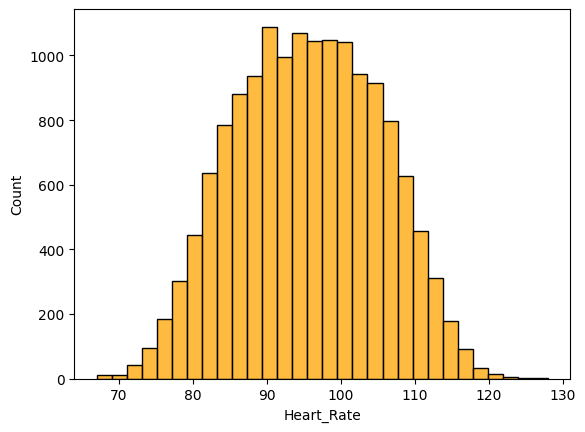

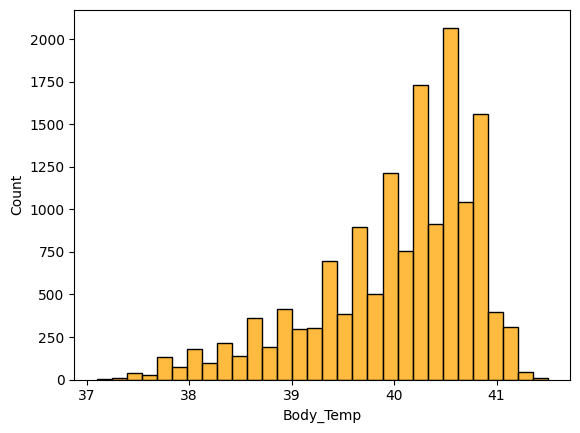

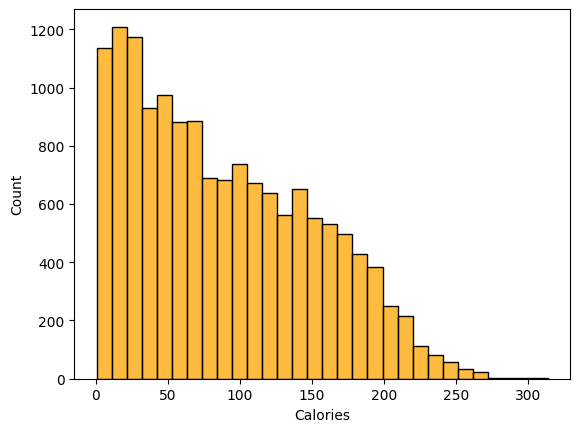

In [10]:
for i in data.columns:
    sns.histplot(data[i],bins=30, color='orange')
    plt.show()


In [11]:
data.shape

(14999, 8)

In [12]:
data.nunique()

Gender          2
Age            60
Height         90
Weight         91
Duration       30
Heart_Rate     59
Body_Temp      45
Calories      277
dtype: int64

#### Mapping Gender column into Numerical values  

In [13]:
gender_map = {'male' : 1,
              'female' : 0}
data['Gender'] = data['Gender'].map(gender_map)

In [14]:
print(data.skew())


Gender        0.014003
Age           0.473273
Height       -0.006310
Weight        0.226611
Duration      0.004626
Heart_Rate   -0.010807
Body_Temp    -0.994509
Calories      0.505261
dtype: float64


# Splitting The Data

In [15]:
x = data.drop('Calories', axis=1)
y = data['Calories']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11999, 7), (3000, 7), (11999,), (3000,))

# Scaling

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
def evaluate(y_true, y_pred, dataset_name):
    print(f" {dataset_name} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False)}")


## Support Victor Regressor

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


In [ ]:
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_test, y_test_pred, "Test Set")

 Training Set Performance:
R² Score: 0.9921852940788253
MAE: 2.287366539954771
RMSE: 5.525706977559356
 Test Set Performance:
R² Score: 0.9913958393783665
MAE: 2.3037728921516907
RMSE: 5.77275730749565


c:\Users\4t4\anaconda3\envs\lstm_myenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\4t4\anaconda3\envs\lstm_myenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [ ]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_test, y_test_pred, "Test Set")

 Training Set Performance:
R² Score: 0.9985470734105021
MAE: 1.65383278038815
RMSE: 2.382612232229173
 Test Set Performance:
R² Score: 0.9966824702827808
MAE: 2.3092395609732974
RMSE: 3.584564967348211


c:\Users\4t4\anaconda3\envs\lstm_myenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\4t4\anaconda3\envs\lstm_myenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# XGB Regressor

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [ ]:
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_test, y_test_pred, "Test Set")

 Training Set Performance:
R² Score: 0.9995405676491146
MAE: 0.9666589813954095
RMSE: 1.339807231770691
 Test Set Performance:
R² Score: 0.9990762285936796
MAE: 1.2602166093947986
RMSE: 1.8915215902249778


c:\Users\4t4\anaconda3\envs\lstm_myenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\4t4\anaconda3\envs\lstm_myenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import joblib
joblib.dump(xgb, "xgb_heart_disease.pkl")
joblib.dump(sc, "scaler_heart_disease.pkl")


'import joblib\njoblib.dump(xgb, "xgb_heart_disease.pkl")\njoblib.dump(sc, "scaler_heart_disease.pkl")\n'